Il nous faut faire une fonction tant que avec une evolution des remplacements dans les transports en fonction du prix
donc 2 facteurs le prix d un robot et le prix d un humain.

On a "n" le nombre de robot, "prixr" le prix d un robot, "prix" le cout d'un humain et "nbreplace" le nombre de place qu sein de l'entreprise étudiée.

In [57]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline     
from matplotlib import animation

In [58]:
def evolution(n ,prixr ,prixh ,nbreplace):
    
    #robot:list[int]
    robot=[0]
    
    #compteurr:int
    compteur_r=0
    
    #compteurh:int
    compteur_h=nbreplace
    
    #humain:list[int]
    humain=[nbreplace]

    for i in range(n):
        
        if (prixr <= prixh):    
            compteur_h = compteur_h-1  # dimin compteur humain
            humain.append(compteur_h)
    
            compteur_r = compteur_r + 1 # augment compteur robot
            robot.append(compteur_r)

        else :

            humain.append(compteur_h)
            robot.append(compteur_r)
            
            
    return (robot, humain)

Pour plus de réalisme, il nous faut maintenant prendre en compte l'espérance de vie du robot et son coût de réparation et donc le possible avantage que ça apporte.

In [59]:
def advantage(prixr, prixh, esp, rep):
    
    #ctotalr:int
    ctotalr = prixr + rep
    
    #ctotalh:int
    ctotalh = prixh * esp
    
    return ctotalr/ctotalh
    

On réécrit la première fonction mais en prenant en compte l'avantage.

In [60]:
def new_evolution(n ,prixr ,prixh ,nbreplace ,esp ,rep):
    #ad:int
    
    ad = advantage(prixr, prixh, esp, rep)
   
    # compteur_r : int
    compteur_r=0
    
    # robot : list[int]
    robot = list()
    robot.append(compteur_r)
    
    # compteur_h : int
    compteur_h=nbreplace
    
    # humain : list[int]
    humain = list()
    
    
    for i in range(n):
        
        
        if (1 >= ad):
            
            compteur_h = compteur_h-1  # dimin compteur humain
            humain.append(compteur_h)
        
            compteur_r = compteur_r + 1 # augment compteur robot
            robot.append(compteur_r)

        else:
            
            humain.append(compteur_h)
            robot.append(compteur_r)
            
    return (robot, humain)

In [61]:
new_evolution(10, 5, 6, 10, 5, 1)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

Mais en économie, le prix baisse en fonction de la production donc on note par conséquent, une variation des prix du marché.

In [62]:
def evolution_prix(prixr,n):
    
    liste_robots_prix = []
    
    liste_robots_prix.append(prixr)
    
    i = 0
      
    while (i < n):
        coef_demande = random.randint(-300,400)//100
        liste_robots_prix.append((liste_robots_prix[i] - (liste_robots_prix[i]//100)*coef_demande))
        i = i+1
        
    return liste_robots_prix

In [63]:
evolution_prix(600, 10)

[600, 606, 606, 624, 606, 594, 604, 598, 598, 598, 598]

In [64]:
def plot_evolution_prix(prixr,n):
    plt.title("Robotisation des transports")
    list_1= evolution_prix(600, 10)
    plt.plot(list_1)
    plt.ylabel("Evoltion du nombre de place")
    plt.xlabel("Annee")
    plt.show()

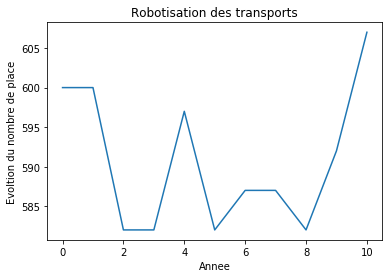

In [65]:
plot_evolution_prix(600, 10)

On l'intègre à la fonction pour plus de réalisme.

In [66]:
def remplacement(n ,prixr ,prixh ,nbreplace ,esp ,rep):
   
    #robot:list[int]
    robot=[0]
    #compteurr:int
    compteur_r=0
    #compteurh:int
    compteur_h=nbreplace
    #humain:list[int]
    humain=[nbreplace]
    #evoprix:list[int]
    evoprix=evolution_prix(prixr,n)
    #i:int
    
    for i in range(n):
        prixr = evoprix[i]
        #ad:int
        ad = advantage(prixr, prixh, esp, rep)
        if (1>ad):
            compteur_h = compteur_h-1  # dimin compteur humain
            humain.append(compteur_h)
            compteur_r = compteur_r + 1 # augment compteur robot
            robot.append(compteur_r)
        else:
            humain.append(compteur_h)
            robot.append(compteur_r)
    return (robot, humain)

In [67]:
remplacement(20, 600, 300, 15, 2, 1)

([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15])

Nous améliorons encore la fonction en supposant que si l'humain revient moins cher qu'un robot, on remplace le robot par un homme.

In [68]:
def new_remplacement(n ,prixr ,prixh ,nbreplace ,esp ,rep):
   
    #robot:list[int]
    robot = [0]
    #compteurr:int
    compteur_r = 0
    #compteurh:int
    compteur_h = nbreplace
    #humain:list[int]
    humain = [nbreplace]
    #evoprix:list[int]
    evoprix = evolution_prix(prixr,n)
    #i:int
    i = 0
    
    while ((i <= n) and (compteur_h >= 0) and (compteur_r >= 0)):
        prixr=evoprix[i]
        #ad:int
        ad=advantage(prixr, prixh, esp, rep)
        if (1>ad):
            compteur_h = compteur_h-1  # diminue compteur humain
            humain.append(compteur_h)
            compteur_r = compteur_r + 1 # augmente compteur robot
            robot.append(compteur_r)
            i=i+1
        else:
            compteur_h = compteur_h + 1 
            humain.append(compteur_h)
            compteur_r = compteur_r - 1
            robot.append(compteur_r)
            i=i+1
    return (robot, humain)

In [69]:
new_remplacement(20, 580, 300, 15, 2, 1)
c=new_remplacement(20, 580, 300, 15, 2, 1)
print(c[0])
print(c[1])


[0, 1, 2, 3, 4, 5, 6, 7, 8, 7, 6, 5, 4, 3, 2, 1, 0, -1]
[15, 14, 13, 12, 11, 10, 9, 8, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]


In [70]:
def plot_new_generation(n ,prixr ,prixh ,nbreplace ,esp ,rep):
    plt.title("Robotisation des transports")
    list_1, list_2 = new_remplacement(n ,prixr ,prixh ,nbreplace ,esp ,rep)
    plt.plot(list_2)
    plt.plot(list_1)
    plt.ylabel("Evolution du nombre de place")
    plt.xlabel("Annee")
    plt.show()

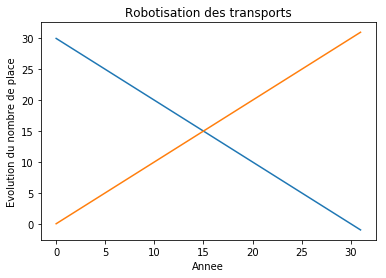

In [71]:
plot_new_generation(70, 580, 300, 30, 2, 1)

In [72]:
def effet_crise(n ,prixr ,prixh ,nbreplace ,esp ,rep, n2):
   
    #robot:list[int]
    robot = [0]
    #compteurr:int
    compteur_r = 0
    #compteurh:int
    compteur_h = nbreplace
    #humain:list[int]
    humain = [nbreplace]
    #evoprix:list[int]
    evoprix = evolution_prix(prixr,n)
    #i:int
    i = 0
    
    while ((i <= n2) and (compteur_h >= 0) and (compteur_r >= 0)):
        prixr=evoprix[i]
        #ad:int
        ad=advantage(prixr, prixh, esp, rep)
        if (1>ad):
            compteur_h = compteur_h-1  # diminue compteur humain
            humain.append(compteur_h)
            compteur_r = compteur_r + 1 # augmente compteur robot
            robot.append(compteur_r)
            i=i+1
        else:
            compteur_h = compteur_h + 1 
            humain.append(compteur_h)
            compteur_r = compteur_r - 1
            robot.append(compteur_r)
            i=i+1
    #x:int
    x = n-n2
    while ((x <= n) and (compteur_h >= 0) and (compteur_r >= 0)):
        prixr=evoprix[x]
        coef = random.randint(1,3)
        prixh = prixh+((prixh*coef)//100)
        ad = advantage(prixr, prixh, esp, rep)
        if( x == n-n2):
            prixr = evoprix[x]
            coef = random.randint(40,60)
            prixh = prixh-((prixh*coef)//100)
            ad = advantage(prixr, prixh, esp, rep)
            if (1>ad):
                compteur_h = compteur_h-1  # diminue compteur humain
                humain.append(compteur_h)
                compteur_r = compteur_r + 1 # augmente compteur robot
                robot.append(compteur_r)
                x=x+1
            else:
                compteur_h = compteur_h + 1 
                humain.append(compteur_h)
                compteur_r = compteur_r - 1
                robot.append(compteur_r)
                x=x+1
        else:
            if (1>ad):
                compteur_h = compteur_h-1  # diminue compteur humain
                humain.append(compteur_h)
                compteur_r = compteur_r + 1 # augmente compteur robot
                robot.append(compteur_r)
                x=x+1
            else:
                compteur_h = compteur_h + 1 
                humain.append(compteur_h)
                compteur_r = compteur_r - 1
                robot.append(compteur_r)
                x=x+1
    return (robot, humain)

In [73]:
def plot_effet_crise(n ,prixr ,prixh ,nbreplace ,esp ,rep, n2):
    plt.title("Robotisation des transports")
    list_1, list_2 = effet_crise(n ,prixr ,prixh ,nbreplace ,esp ,rep, n2)
    plt.plot(list_2, label="humains")
    plt.plot(list_1, label="robots")
    plt.ylabel("Evolution du nombre de place")
    plt.xlabel("Annees")
    plt.legend()
    plt.show()

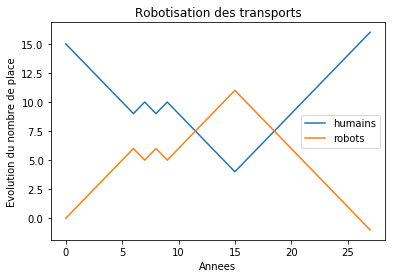

In [74]:
plot_effet_crise(70, 580, 300, 15, 2, 1, 50)

In [75]:
def fonction_compteur_r(compteur_r, nbreplace):
  
    if (compteur_r <= 0): 
        compteur_r = 0
        return compteur_r
    
    elif (compteur_r > nbreplace):
        compteur_r = nbreplace
        return compteur_r
    
    else: 
        return compteur_r

In [76]:
def fonction_compteur_h(compteur_h, nbreplace):
    
    if (compteur_h <= 0): 
        compteur_h = 0
        return compteur_h
    
    elif (compteur_h > nbreplace):
        compteur_h = nbreplace
        return compteur_h
    
    else: 
        return compteur_h

In [77]:
def effet_crise(n ,prixr ,prixh ,nbreplace ,esp ,rep, n2, n3):
   
    #robot:list[int]
    robot = [0]
    
    #compteurr:int
    compteur_r = 0
    
    #compteurh:int
    compteur_h = nbreplace
    
    #humain:list[int]
    humain = [nbreplace]
    
    #evoprix:list[int]
    evoprix = evolution_prix(prixr,n)
    
    #i:int
    i = 0
    
    while (i <= n2):
        
        prixr=evoprix[i]
        
        #ad:int
        ad=advantage(prixr, prixh, esp, rep)
            
        
        if (1>ad):
            
            compteur_h = compteur_h - 1   # diminue compteur humain
            compteur_r = compteur_r + 1 # augmente compteur robot
            
            robot.append(compteur_r)
            humain.append(compteur_h)

            i=i+1
           
            
        else:
 
            compteur_h = compteur_h + 1 
            humain.append(fonction_compteur_h(compteur_h, nbreplace))
        
            compteur_r = compteur_r - 1
            robot.append(fonction_compteur_r(compteur_r, nbreplace))
            i=i+1
    
    #x:int
    x=n2
    
    
    while (x < n3):
        
        prixr = evoprix[x]
        coef = random.randint(1,3)
        prixh = prixh+((prixh*coef)//100)
        ad = advantage(prixr, prixh, esp, rep)
        
        if( x == n2):
            
            prixr = evoprix[x]
            coef = random.randint(40,50)
            prixh = prixh-((prixh*coef)//100)
            ad = advantage(prixr, prixh, esp, rep)
            
            if (1>ad):
            
                compteur_h = compteur_h-1  # diminue compteur humain
                humain.append(fonction_compteur_h(compteur_h, nbreplace))
        
                compteur_r = compteur_r + 1 # augmente compteur robot
                robot.append(fonction_compteur_r(compteur_r, nbreplace))
                x = x+1
           
            
            else:
 
                compteur_h = compteur_h + 1 
                humain.append(fonction_compteur_h(compteur_h, nbreplace))
        
                compteur_r = compteur_r - 1
                robot.append(fonction_compteur_r(compteur_r, nbreplace))
                x = x+1
        
        else:
    
            if (1>ad):
            
                compteur_h = compteur_h-1  # diminue compteur humain
                humain.append(fonction_compteur_h(compteur_h, nbreplace))
        
                compteur_r = compteur_r + 1 # augmente compteur robot
                robot.append(fonction_compteur_r(compteur_r, nbreplace))
                x = x+1
           
            
            else:
 
                compteur_h = compteur_h + 1 
                humain.append(fonction_compteur_h(compteur_h, nbreplace))
        
                compteur_r = compteur_r - 1
                robot.append(fonction_compteur_r(compteur_r, nbreplace))
                x = x+1
                
    #y:int
    y = n3
    
    while (y <= n):
        
        prixr=evoprix[y]
        coef = random.randint(-3,3)
        prixh = prixh+((prixh*coef)//100)
        ad = advantage(prixr, prixh, esp, rep)
 
        if (1>ad):
            
            compteur_h = compteur_h-1  # diminue compteur humain
            humain.append(fonction_compteur_h(compteur_h, nbreplace))
        
            compteur_r = compteur_r + 1 # augmente compteur robot
            robot.append(fonction_compteur_r(compteur_r, nbreplace))
            y=y+1
           
            
        else:
 
            compteur_h = compteur_h + 1 
            humain.append(fonction_compteur_h(compteur_h, nbreplace))
    
            compteur_r = compteur_r - 1
            robot.append(fonction_compteur_r(compteur_r, nbreplace))
            y=y+1
        
            
    return (robot, humain)

In [78]:
def plot_effet_crise(n ,prixr ,prixh ,nbreplace ,esp ,rep, n2, n3):
    plt.title("Robotisation des transports")
    list_1, list_2 = effet_crise(n ,prixr ,prixh ,nbreplace ,esp ,rep, n2, n3)
    plt.plot(list_2, label="humains")
    plt.plot(list_1, label="robots")
    plt.ylabel("Evolution du nombre de place")
    plt.xlabel("Annees")
    plt.legend()
    plt.show()

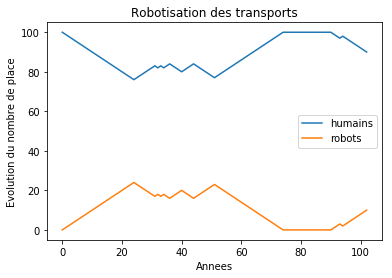

In [82]:
plot_effet_crise(100, 500, 300, 100, 2, 1, 50, 80)